<a href="https://colab.research.google.com/github/Vngel0/Python_UC/blob/main/Clase_6_NB_SVM_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine, LDA/QDA y Naive Bayes

En esta clase, revisaremos tres modelos supervisados que sirven para problemas de clasificación. Los veremos con algunos sets de datos, revisaremos sus hiper-parámetros más relevantes y también compararemos los desempeños sobre el mismo dataset.

## Support Vector Machine

En su forma más simplificada es un algoritmo que busca separar (clasificar) dividiendo el espacio mediante un hiper-plano. Por supuesto lo anterior no solo no es visible al ojo humano en altas dimensiones si no que tampoco es muy util para configuraciones de datos más complejas, por ello una versión más general utiliza una curva que divide el plano en dos o más regiones y así permite generar clasificaciones más certeras.

Para partir explicando este método cargaremos el set de datos que utilizaremos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

Cancer_dataset = load_breast_cancer()
display(Cancer_dataset)

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [2]:
Cancer_dataset['data'][0:2]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]])

In [3]:
Cancer_dataset['target'][0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [4]:
Cancer_dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Con el comando `np.c_` podemos concatenar las listas en un columnas, por ende le daremos nuestros array de data que viene como lista, y nuestro target, y formaremos un data frame:

In [5]:
#Concatenamos
np.c_[Cancer_dataset['data'],Cancer_dataset['target']][0:2]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01,
        0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02,
        0.000e+00]])

In [6]:
# Transformamos a data frame y preservamos los nombres
Cancer_df = pd.DataFrame(np.c_[Cancer_dataset['data'],Cancer_dataset['target']], columns = np.append(Cancer_dataset['feature_names'],'target'))
Cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [7]:
display(Cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

None

Ahora haremos algunos gráficos para ver si tenemos alguna opción de que SVM pueda generar alguna separación o clasificación dentre cancer benigno o maligno. Para ello generaremos algunos scatter plot entre pares de variables y coloreando acorde a la variable target, de modo de ver si existe algun tipo de separación entre las variables según target.

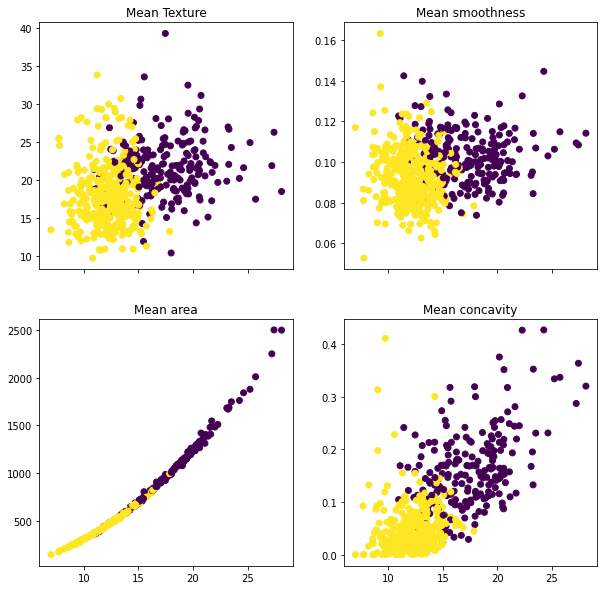

In [8]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10), sharex = True)
ax[0,0].scatter(Cancer_df['mean radius'],Cancer_df['mean texture'], c = Cancer_df['target']) #el orden es ejes: x-y y luego color
ax[0,1].scatter(Cancer_df['mean radius'],Cancer_df['mean smoothness'], c = Cancer_df['target'])
ax[1,0].scatter(Cancer_df['mean radius'],Cancer_df['mean area'], c = Cancer_df['target'])
ax[1,1].scatter(Cancer_df['mean radius'],Cancer_df['mean concavity'], c = Cancer_df['target'])
ax[0, 0].set_title('Mean Texture')
ax[0, 1].set_title('Mean smoothness')
ax[1, 0].set_title('Mean area')
ax[1, 1].set_title('Mean concavity')
plt.show()

Gráficamente se observa que existe una cierta agrupación de puntos según el cancer es benigno o maligno, y además aparentemente podría ser separable o clasificable mediante un hiper-plano, por lo que SVM podría funcionar. 

Ahora, haciendo el ajuste del modelo tenemos lo siguiente

In [19]:
# Split en train y test datasets
from sklearn.model_selection import train_test_split
X = Cancer_df.drop('target',axis = 1)
y = Cancer_df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

Aquí ajustaremos el modelo.

Utilizaremos 2 hiperparámetros para este ejemplo
 - Kernel: Es la fórmula de cálculo utilizada para medir la distancia entre los valores y el hiperplano. Los comunmente utilizados son linear: $<x,x'>$ y rbf: $\exp(-\gamma \|x-x'\|^2)$ donde $\gamma$ debe ser especificado como parámetro y debe ser mayor a cero.
 
 - C: Parámetro de regularización. Por defecto es 1 y si hay mucho ruido en la data (parámetros que no aporten mucho) el valor debe disminuir.
 
 (Fuente: https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation)

In [20]:
# Ajuste del modelo
from sklearn.svm import SVC

svm_model = SVC(kernel = 'linear', C = 100) # C parameter, kernel. Los podriamos mejorar con un CV search :)
svm_model.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        42
         1.0       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



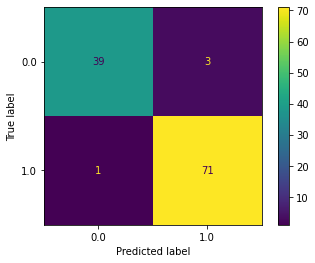

In [37]:
# Validando el modelo

predict = svm_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
confusion = confusion_matrix(y_test,predict)
display(confusion)
print(classification_report(y_test, predict))

def validate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  plot_confusion_matrix(svm_model, X_test, y_test)
  print(classification_report(y_test, y_pred))

validate_model(svm_model, X_test, y_test)

$ w_1 x_1+  w_2 x_2\dots  w_n x_n+ c = 0$

In [12]:
svm_model.coef_

array([[ 11.80319861,  -1.48138365,   4.24902999,  -0.41264388,
        -11.03501699,  -5.28049316, -23.71518218, -15.74121763,
        -17.59819836,   1.08778704,   0.49127827,  -5.99207544,
          3.10882073,  -0.66802634,  -3.3771315 ,   8.29884572,
         -2.53958398,  -4.57155878,  -4.4006725 ,   1.87953802,
        -18.66838995,  -0.35295751,  -1.34228291,   0.15196033,
        -18.27224318,  -0.91645434, -39.88870104, -40.68168113,
        -49.17131178,   1.62073749]])

Lo anterior funciona bastante bien y dicho resultado va en línea con lo observado en los gráficos. Ahora veremos otro ejemplo donde los datos son dificiles de separar mediante métodos lineales y entonces tendremos que adaptar nuestro modelo para mejorar el performance.

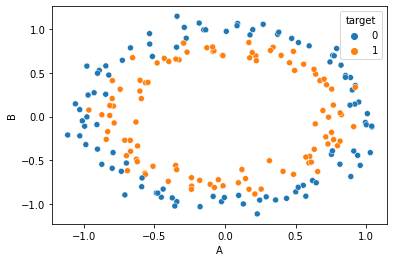

In [46]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(n_samples = 200, noise = 0.08)

df = pd.DataFrame(data = X, columns = ["A", "B"])
df["target"] = y
sns.scatterplot(data = df, x = "A", y = "B", hue = "target");

X:


array([[-0.00420249,  0.06788397],
       [ 0.11634907, -0.8136214 ],
       [-0.30527531,  0.18194453]])

y:


array([1, 0, 1])

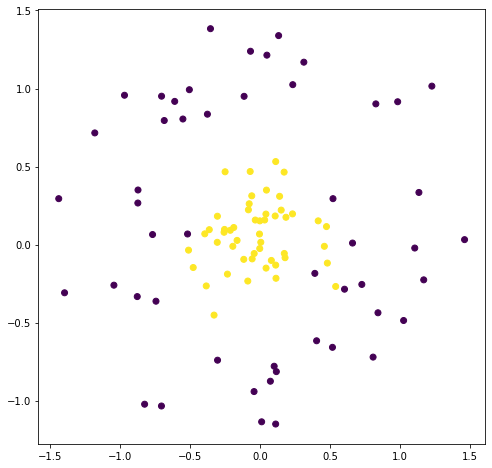

In [47]:
# Creamos los datos
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=0.25)
print("X:")
display(X[0:3,:])
print("y:")
display(y[0:3])
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [48]:
#Crear df con la data sintética y guardad en un archivo

circle_data = pd.DataFrame(np.c_[X,y])
circle_data.to_csv('circle_data.csv')

array([[9, 1],
       [1, 9]])

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



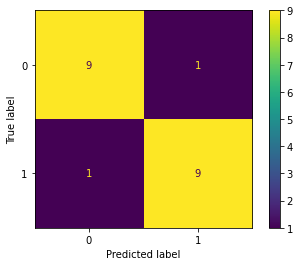

In [49]:
# Entrenando el modelo
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

svm_model = SVC(kernel = 'rbf') #rbf, sigmoid, poly # 0,0001 < gamma < 10, 0,1 < C < 100
svm_model.fit(X_train, y_train)

# Verificando el modelo
predict = svm_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
confusion = confusion_matrix(y_test,predict)
display(confusion)
print(classification_report(y_test, predict))

validate_model(svm_model, X_test, y_test)

In [50]:
model.predict([[0.5, 0.5]])

NameError: ignored

El modelo funciona de manera similiar para cuando uno desea hacer regresión, solo que en vez de importa SVC (support vector classification) traemos SVR (support vector regression). Para más información del uso y parámetros asociados al método de regresión, pueden visitar https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html


# Análisis Discriminante Lineal y Cuadrático (LDA y QDA)

Similar al modelo anterior, que asume que la data es i.i.d., este modelo también se basa en un supuesto distribucional de los datos. En el caso del LDA y el QDA estamos asumiendo una distribución normal multivariada de los datos para poder calcular nuestras probabilidades (todo esto ha sido profundizado en sus clases teoricas HEF).

Ahora nos enfocaremos en los códigos para poder aplicar lo visto. Utilizaremos nuestro querido set de datos iris por simplicidad y para entender la diferencia entre las clases multiples y no los simples vectores respuesta "si" y "no" que hemos usado.

In [74]:
df = pd.read_csv('iris.csv').drop(columns='Unnamed: 0')# botamos la columna de index
# guardamos las etiquetas de cada clase para posterior uso.
target_label = df['Species'].unique()
print(df.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [63]:
from sklearn.datasets import load_iris

dataset = load_iris()

df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
df["target"] = dataset.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Visualicemos cada una de las características

In [72]:
df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

ValueError: ignored

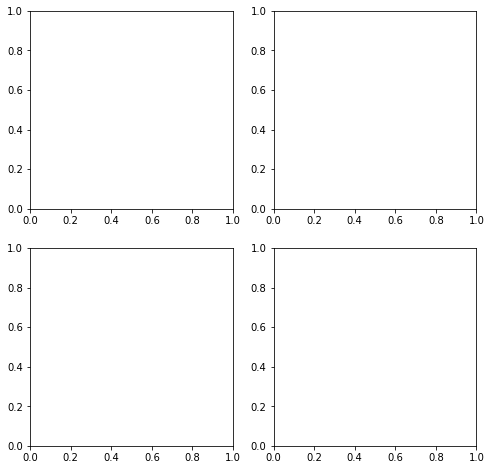

In [73]:

fig,axes = plt.subplots(2, 2, figsize = (8,8))
sns.histplot(data = df, X = 'sepal length (cm)', hue = "target", alpha = 0.5, ax = axes[0,0])
sns.histplot(data = df, X = 'sepal width (cm)', hue = "target", alpha = 0.5, ax = axes[1,0])
sns.histplot(data = df, X = 'petal length (cm)', hue = "target", alpha = 0.5, ax = axes[0,1])
sns.histplot(data = df, X = 'petal width (cm)', hue = "target", alpha = 0.5, ax = axes[1,1])

ValueError: ignored

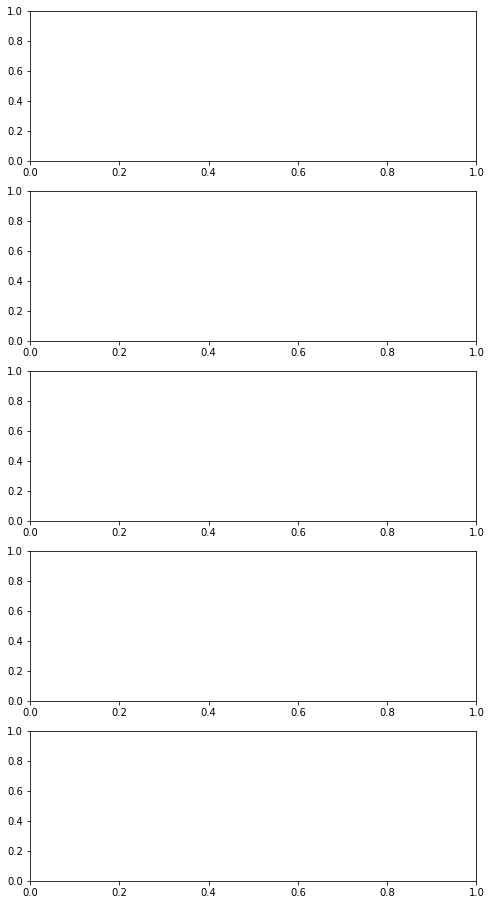

In [66]:
fig, axes = plt.subplots(nrows= len(df.columns), figsize = (8,16))

for i, col in enumerate(df.columns):
  sns.histplot(data = df, X = col, hue = 'target', alpha = 0.5, ax = axes[i])

In [62]:
plt.figure(figsize=(10, 6))
for n, i in enumerate(df.drop(columns = 'Species').columns):
    plt.subplot(2, 2, n + 1)
    df.groupby('Species')[i].plot(kind='hist', alpha=.5)
    plt.legend(df['Species'].unique())
    plt.title(i)
    plt.tight_layout()

KeyError: ignored

<Figure size 720x432 with 0 Axes>

A simple vista pareciera observarse normalidad en las variables, aunque lo correcto sería realizar un test estadístico.

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df['Species'] = LabelEncoder().fit_transform(df['Species'])

In [76]:
X_train_mat, X_test_mat, y_train_vec, y_test_vec =train_test_split(df.loc[:, 'Sepal.Length':'Petal.Width'],
                                                        df['Species'], test_size=.33, random_state=2021)

Ahora instanciaremos nuestro modelo y analizaremos 3 hiperparámetros:

   - priors: Permite ingresar la probabilidad a priori para cada clase en el algoritmo de entrenamiento. Éstos deben ser ingresados como una lista especificando la probabilidad entre 0 y 1 para cada clase
   - n_components: Cantidad de discriminantes lineales a estimar. Por defecto el método estima que el número de discriminantes lineales a estimar es $1 - N_y$
   - Solver: especifica el método numérico para calcular la solución al sistema. Mediante la especificación de este en un modelo, podemos obtener estimaciones con un mayor grado de eficiencia. Por ejemplo, cuando implementamos modelos con matrices dispersas, el solver por defecto liblinear será mucho más lento que `sag` o `saga`.

In [77]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_mat, y_train_vec)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [78]:
LinearDiscriminantAnalysis(n_components=None, priors=None, solver='svd')

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [79]:
print("Probabilidades a priori\n", lda_model.priors_, "\n")
print("Medias de atributos en cada clase\n", lda_model.means_.round(2), "\n")
print("Varianza explicada por cada discriminante\n", lda_model.explained_variance_ratio_.round(2), "\n")

Probabilidades a priori
 [0.33 0.31 0.36] 

Medias de atributos en cada clase
 [[5.12 3.52 1.49 0.25]
 [5.93 2.76 4.22 1.31]
 [6.61 2.99 5.55 2.05]] 

Varianza explicada por cada discriminante
 [0.99 0.01] 



con `.predict` extraeremos las clases predichas para observar que fue lo que estimó

In [80]:
lda_class_pred = lda_model.predict(X_test_mat)
lda_class_pred[:15]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1])

In [81]:
pd.crosstab(y_test_vec, lda_class_pred) #matriz de confusion rápida

col_0,0,1,2
Species,,,
0,17,0,0
1,0,18,1
2,0,1,13


In [82]:
print(classification_report(y_test_vec, lda_class_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        14

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



## QDA

Ahora veremos un QDA, donde los atributos de la matriz de datos se distribuyen de forma multivariada normal condicional a las clases, lo que nos permite mayor flexibilidad. Esto en otras palabras significa que LDA asume que las matrices de varianza-covarianza de todas las clases son las mismas, lo que resulta en un límite de decisión lineal (he ahi el L de LDA). En contraste, el QDA permite diferentes matrices de varianza covarianza para diferentes clases, lo que implica una límite de decisión cuadrático (y de ahí sale el Q de QDA).

In [83]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_model = QuadraticDiscriminantAnalysis().fit(X_train_mat, y_train_vec)
qda_class_pred = qda_model.predict(X_test_mat)

In [84]:
pd.crosstab(y_test_vec, qda_class_pred)

col_0,0,1,2
Species,,,
0,17,0,0
1,0,16,3
2,0,0,14


In [85]:
print(classification_report(y_test_vec, qda_class_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.84      0.91        19
           2       0.82      1.00      0.90        14

    accuracy                           0.94        50
   macro avg       0.94      0.95      0.94        50
weighted avg       0.95      0.94      0.94        50



Nota: No hemos alterado ningún hiperparámetro, revisar cuales y como modificarlos

# Naive Bayes

Con el algoritmo de naive bayes podemos trabajar multiclases a través de multinomial-naive bayes y además, si es que poseemos información a priori, es posible entregarla al modelo por su naturaleza bayesiana. 

A continuación realizaremos algo distinto a lo que hemos trabajado: exploraremos como trabajar  reconocimiento de texto con la función `CountVectorizer` en donde leeremos las letras de varias canciones, y luego predeciremos el género al cual pertenece una canción, en función de su letra.

Para poder trabajar con textos, debemos pasarlos a una matriz dispersa (sparse matrix), donde cada fila representará una entrada (en este caso, una canción), y cada columna representará una palabra (token). Cada celda de dicha matriz contará la cantidad de palabras en dicho registro, es por esto que por naturaleza hay muchos registros vacios. Visualizaremos esto con ceros, pero una matriz sparse tendría dichas celdas vacías, para poder ahorrar memoria. Primero ejemplifiquemos como funciona esto, y luego trabajaremos con nuestros datos

In [ ]:
# Librerias para tratamiento de texto
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Textos de ejemplo
textos = ['Este es el primer documento',
           'Este documento es el segundo documento',
           'Este es el tercero',
           'Y el cuarto']

In [ ]:
#Inicializamos nuestro modelo 
count_vectorizer=CountVectorizer()

In [ ]:
# Le entregamos nuestra data
count_vectorizer_fit = count_vectorizer.fit_transform(textos)
count_vectorizer_fit
# Esto creará una matriz donde cada fila es una de las  lineas de texto, y cada columna es una palabra

Lo anterior lo podemos visualizar de la siguiente forma:

In [ ]:
display(count_vectorizer.get_feature_names()) #lista de nombres
display(count_vectorizer_fit.toarray()) # matriz sparse

Ahora, como nosotros queremos usar esta información para el cálculo de un modelo, podemos extraer el peso de cada palabra función de su repetición de todos los textos, y así sabremos que palabras son mejores para rescatar la idea. esto lo podemos hacer con `TfidfTransformer`:

In [ ]:
#inicializamos nuestro objeto
tfid =  TfidfTransformer()

In [ ]:
#obtenemos sus pesos, dandole la matriz sparse que creamos (ojo, no el array con los ceros!)
tfid_fit = tfid.fit(count_vectorizer_fit)

In [ ]:
tfid_fit.idf_ #objeto que tiene los pesos de cada palabra

In [ ]:
#visualicemos el peso de las palabras en un data frame
df_idf = pd.DataFrame(tfid_fit.idf_, index=count_vectorizer.get_feature_names(),columns=["idf_pesos"]) 
 
# orodenar de menos a mas peso
df_idf.sort_values(by=['idf_pesos'])

Esto asume que las palabras menos comunes, son clave para reconocer a que texto pertenecen.

Como hay una cadena de pasos, hemos visto en clases anteriores que podemos unificarlas todas con  `pipe`, que en resumidas cuentas hace todo en un solo paso:

In [ ]:
pipe = Pipeline([('countvec', CountVectorizer()),
                  ('tfid', TfidfTransformer())]).fit(textos)

In [ ]:
#obtenemos su información de la misma manera
pipe['countvec'].transform(textos).toarray()

In [ ]:
pipe['tfid'].idf_

Perfecto!! Ahora pongamos todo lo que vimos en práctica, y categorizemos las canciones que tenemos bajo sus letras.

En la carpeta `canciones` encontraremos múltiples canciones, sus letras, y el género al cual pertenecen. Como leeremos múltiples archivos csv, la función `glob` nos permitirá leer todos los archivos que están en una carpeta, en un solo archivo pandas.

In [ ]:
import glob

In [ ]:
lista_de_rutas = glob.glob("canciones/*.csv")

In [ ]:
lista_de_rutas[0:3] #con esto tenemos todas las rutas de cada uno de los archivos csv de la carpeta

Como tenemos todas las rutas, leeremos todos los archivos y los iremos agregando en una lista:

In [ ]:
lista = []
for i in lista_de_rutas:
    cancion = pd.read_csv(i, index_col=None, header=0)
    lista.append(cancion)

Finalmente concatenaremos los objetos de la lista en un objeto data frame, con la función `pd.concat`.

In [ ]:
data = pd.concat(lista, axis=0, ignore_index=True)
data.head(3)

In [ ]:
#limpiamos un poco
df = data.drop('Unnamed: 0',axis = 1)
df = df.rename(columns = {'0': 'Artista', '1': 'Genero', '2':'Cancion','3':'Letra'}, inplace = False)
df.head(3)

Visualizando un poco la data, podremos ver que artistas tienen más canciones:

In [ ]:
plt.figure(figsize=(24,6))
df.groupby('Artista').agg('count').sort_values('Cancion',ascending=False)['Cancion'].plot(kind='bar',fontsize =16);

Y nuestro vector objetivo, recordemos que es multiclase:

In [ ]:
df.groupby('Genero').agg('count').sort_values('Cancion',ascending=False)['Cancion'].plot(kind='bar',fontsize =12);

Ahora generemos nuestro modelo, recordemos nuestro train/test para validar los resultados de naive bayes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.Letra, df[ 'Genero' ],test_size= .4 ,random_state= 60 )

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Ojo, haremos todo junto: el count vectorizer, el calculo de sus pesos y el modelo Naive Bayes.
#No le entregaremos ninguna prior por el momento

In [ ]:
pipeline_model =  Pipeline([
    ('vect', CountVectorizer(stop_words="english")),
    ('tfidf', TfidfTransformer()),
    ('MnB', MultinomialNB(fit_prior=False)),
])

In [ ]:
pipeline_model.fit(X_train, y_train)
y_hat = pipeline_model.predict(X_test)

In [ ]:
pd.crosstab(y_test, y_hat)

In [ ]:
print(classification_report(y_test, y_hat));

Podemos ver que el modelo tiene un muy mal f1-score para pop, pero como es un modelo bayesiano, podemos entregar un vector de valores prioris que influyan en su resultado. Usaremos la siguiente priori [0.15,0.2,0.45,0.2], que significa que previamente creemos que el 15% es hip hop, el 20% es metal, el otro 45% pop y el ultimo 20% rock

In [ ]:
pipeline_model2 =  Pipeline([
    ('vect', CountVectorizer(stop_words="english")),
    ('tfidf', TfidfTransformer()),
    ('MnB', MultinomialNB(class_prior=[0.15,0.2,0.45,0.2])),
])
pipeline_model2.fit(X_train, y_train)
y_hat2 = pipeline_model2.predict(X_test)

In [ ]:
print(classification_report(y_test, y_hat2));

Podemos observar que una priori es capaz de ayudar mejorar las métricas: Ahora el f1-score de pop subió de 0,06 a 0,21. Encontrar la mejor priori posible es un muy buen problema estadístico a resolver. También es posible probar diferentes conbinaciones de prioris con validación cruzada para obtener mejores métricas.

Finalmente tomaremos nuestro último modelo que es el mejor que tenemos hasta ahora, y veamos si podemos predecir que tipo de música pertenecen las siguientes letras, de los grupos Queen, Gorguts, Snoop Dogg y Britney Spears, que son artistas pertenecientes a cada clase que tenemos

In [ ]:
letras = [ 'I want to break free I want to break free I want to break free from your lies Youre so self satisfied I dont need you' , # Queen - i want to break free
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
'Lookin at the ladies, all of them fly I dont know which one I want, dog' , # Snoop Dogg - Let's Get Blown
'ups I think I did it again I made you believe we re more than just friends Oh baby' #Britney Spears - Oops!...I Did It Again
]

In [ ]:
pipeline_model2.predict(letras)

El modelo pudo predecir 3 de las 4 clases, pero sigue teniendo problemas con una canción pop (esperable por su bajo f1-score con dicha clase)

# Ejercicios

Con el fin de clasificar las distintas actividades que puede realizar una persona, se realizó un experimento a un grupo de 
30 voluntarios dentro de un grupo de edad de 19 a 48 años. Cada persona realizó seis actividades (CAMINAR, CAMINAR POR LAS ESCALERAS, BAJAR LAS ESCALERAS, SENTARSE, DE PIE, RECOSTARSE) con un smartphone (Samsung Galaxy S II) conectado en su cintura. Usando el acelerómetro y giroscopio integrados en el smartphone, se tienen la siguiente data:


-Aceleración triaxial del acelerómetro (aceleración total) y la aceleración corporal estimada.

-Velocidad angular triaxial del giroscopio.

-Variables de dominio de tiempo y frecuencia.

-Su etiqueta de actividad.

-Un identificador del sujeto que realizó el experimento.

El conjunto de datos obtenido se ha dividido aleatoriamente en dos conjuntos (train y test), donde se seleccionó al 70% de los voluntarios para generar los datos de entrenamiento y al 30% los datos de la prueba.

Estos datos se encuentran en los siguientes links:

train: https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/train.csv

test: https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/test.csv


- a) Cargue los set de datos de entrenamiento y prueba. ¿Cuáles son las dimensiones de estos set de datos?

- b) Estudie la cantidad de registros que hay en cada actividad en el set de entrenamiento. Para esto, una opción es utilizar la función de pandas `crosstab(index=columna, columns="count")`. ¿Cómo se encuentran repartidas las Actividades? ¿Existe algún desbalance en las categorías? Comente.

- c) Defina X_train y X_test como corresponda (omitiendo las variables que no corresponden a variables predictoras).

- d) Estandarice el set de features de entrenamiento y prueba. Recuerde que puede utilizar la función vista en clases `StandardScaler`

- e) Defina  y_train e y_test como corresponda (recuerde que debe estar codificada numéricamente). Para recodificar un vector o columna _y_ de varias categorías a formato numérico. Puede utilizar `LabelEncoder()`

- f) Defina un diccionario llamado `param_grid` con las opciones de:
    - kernel que se mueva entre linear o rbf
    - C que se mueva con los valores 10 ó 15

- g) Utilice la función `GridSearchCV` para realizar 10 validaciones cruzadas con la lista de parámetros definida anteriormente (Esto puede tardar un poco). Determine la mejor combinación de parámetros y obtenga el modelo con dichos parámetros. 

- h) ¿Cómo es la capacidad predictiva de este modelo en el set de prueba? Comente.